SALES PREDICTION

In [25]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [26]:
df = pd.read_csv('advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


Data Preprocessing

In [27]:
df.shape

(200, 4)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [29]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Checking Null Values

In [30]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [31]:
correlation = df.corr()
correlation


,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [33]:
X = df[['TV', 'Radio', 'Newspaper']]
Y = df['Sales']

Splitting itno train and test

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.6, random_state=6)
X.shape,X_train.shape, X_test.shape

((200, 3), (80, 3), (120, 3))

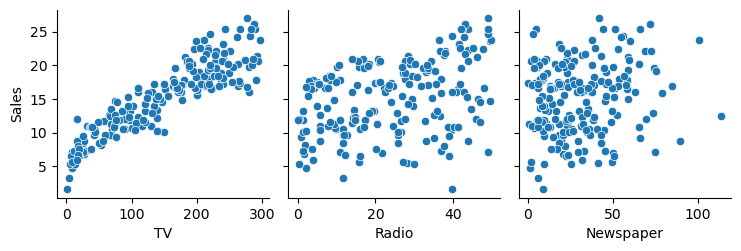

In [35]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', kind='scatter')
plt.show()

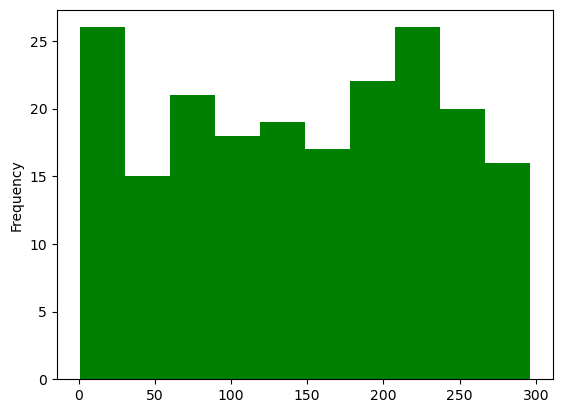

In [36]:
#for histogram plot of TV
df['TV'].plot.hist(bins=10, color='green')
plt.show()

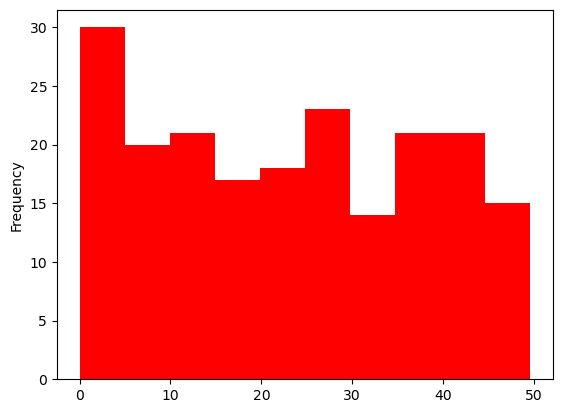

In [37]:
#for histogram plot of Radio
df['Radio'].plot.hist(bins=10, color='red')
plt.show()

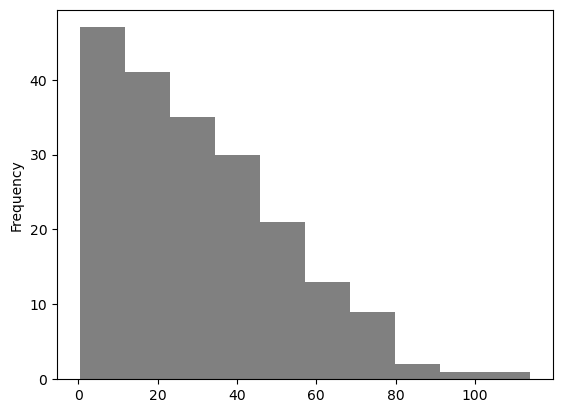

In [38]:
#for histogram plot of Newspaper
df['Newspaper'].plot.hist(bins=10,color='Grey')
plt.show()

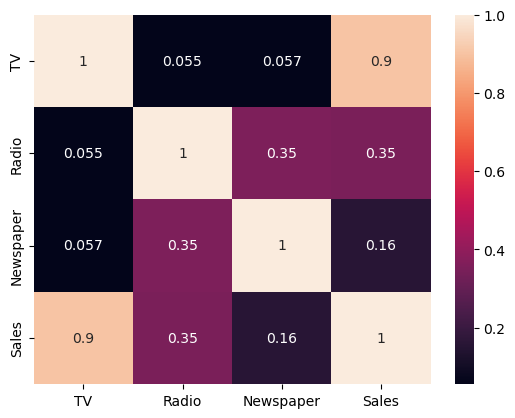

In [39]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [40]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [41]:
X_train_prediction = model.predict(X_train)
X_test_prediction = model.predict(X_test)

In [42]:
mse = mean_squared_error(Y_test, X_test_prediction)
mse

2.47953827463085

In [43]:
rmse = mean_squared_error(Y_test, X_test_prediction, squared=False)
rmse

1.5746549700270374

In [44]:
rf = RandomForestRegressor(random_state=5)
rf.fit(X_train, Y_train)

RandomForestRegressor(random_state=5)

In [45]:
rf_test_predict =rf.predict(X_test)

In [46]:
rf_mse = mean_squared_error(Y_test, rf_test_predict)
rf_mse

2.111143141666662

In [47]:
rf_mse = mean_squared_error(Y_test, rf_test_predict, squared=False)
rf_mse

1.452977336941861

In [48]:
rf_r2 = r2_score(Y_test, rf_test_predict)
rf_r2

0.9235035303465825